# 머신러닝의 한계(XOR 문제)

## 머신러닝 XOR

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

print(tf.__version__)

2.2.0


data

In [ ]:
train_data = np.array([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=np.float32)
train_labels = np.array([[0], [1], [1], [0]], dtype=np.float32)

create the model

In [ ]:
def build_model():
  model = keras.Sequential([
    keras.layers.Dense(units=1, input_dim=2, activation='sigmoid')
  ])

  optimizer = keras.optimizers.SGD(lr=1e-2)

  model.compile(loss='binary_crossentropy',
                optimizer=optimizer,
                metrics=['accuracy'])
  return model

model = build_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


Train the model

In [ ]:
EPOCHS = 10000

history = model.fit(train_data, train_labels, epochs=EPOCHS, verbose=0)

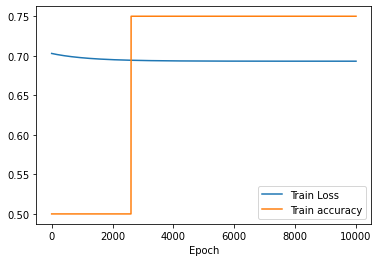

In [ ]:
import matplotlib.pyplot as plt


def plot_history(history):
  plt.figure()
  plt.xlabel('Epoch')
  plt.plot(history.epoch, np.array(history.history['loss']), 
           label='Train Loss')
  plt.plot(history.epoch, np.array(history.history['accuracy']), 
           label='Train accuracy')
  plt.legend()

plot_history(history)

In [ ]:
test_predictions = model.predict(train_data).flatten()

test_predictions

array([0.5021408 , 0.5003961 , 0.50027585, 0.49853107], dtype=float32)

In [ ]:
prediction = []

for i in test_predictions:
  if i > 0.5:
    prediction.append(1)
  else:
    prediction.append(0)

# prediction error
def prediction_error(prediction, train_labels):
  error_sum = 0
  for i in range(len(prediction)):
    if prediction[i] != train_labels[i][0]:
      error_sum = error_sum + 1
  return error_sum / len(prediction) * 100

print(prediction_error(prediction, train_labels))

print(prediction)
print(train_labels)

25.0
[1, 1, 1, 0]
[[0.]
 [1.]
 [1.]
 [0.]]


## 딥러닝 XOR

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

print(tf.__version__)

2.2.0


data

In [ ]:
train_data = np.array([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=np.float32)
train_labels = np.array([[0], [1], [1], [0]], dtype=np.float32)

create the model

In [ ]:
def build_model():
  model = keras.Sequential([
    keras.layers.Dense(units=2, input_dim=2, activation='sigmoid'),
    keras.layers.Dense(units=1, input_dim=2, activation='sigmoid')
  ])

  optimizer = keras.optimizers.SGD(lr=1e-1)

  model.compile(loss='binary_crossentropy',
                optimizer=optimizer,
                metrics=['accuracy'])
  return model

model = build_model()
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 2)                 6         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 3         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


Train the model

In [ ]:
EPOCHS = 10000

history = model.fit(train_data, train_labels, epochs=EPOCHS, verbose=0)

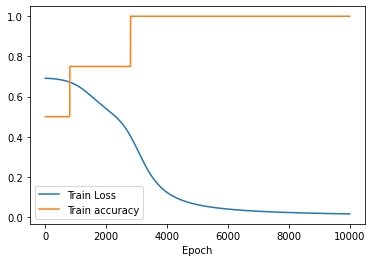

In [ ]:
import matplotlib.pyplot as plt


def plot_history(history):
  plt.figure()
  plt.xlabel('Epoch')
  plt.plot(history.epoch, np.array(history.history['loss']), 
           label='Train Loss')
  plt.plot(history.epoch, np.array(history.history['accuracy']), 
           label='Train accuracy')
  plt.legend()

plot_history(history)

In [ ]:
test_predictions = model.predict(train_data).flatten()

test_predictions

array([0.0124538 , 0.9831693 , 0.98317486, 0.0156135 ], dtype=float32)

In [ ]:
prediction = []

for i in test_predictions:
  if i > 0.5:
    prediction.append(1)
  else:
    prediction.append(0)

# prediction error
def prediction_error(prediction, train_labels):
  error_sum = 0
  for i in range(len(prediction)):
    if prediction[i] != train_labels[i][0]:
      error_sum = error_sum + 1
  return error_sum / len(prediction) * 100

print(prediction_error(prediction, train_labels))

print(prediction)
print(train_labels)

0.0
[0, 1, 1, 0]
[[0.]
 [1.]
 [1.]
 [0.]]


# mnist NN

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

print(tf.__version__)

2.3.0


data

11493376/11490434 [==============================] - 1s 0us/step
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]

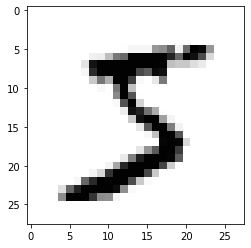

In [2]:
mnist = tf.keras.datasets.mnist

(train_data, train_labels), (test_data, test_labels) = mnist.load_data()

print(train_data[0])
plt.imshow(train_data[0].reshape(28, 28), cmap='Greys', interpolation='nearest')
plt.show()


# normalizing data
train_data, test_data = train_data / 255.0, test_data / 255.0


In [3]:
# change data shape

print(train_data.shape)

train_data = train_data.reshape(train_data.shape[0], train_data.shape[1] * train_data.shape[2])
test_data = test_data.reshape(test_data.shape[0], test_data.shape[1] * test_data.shape[2])

print(train_data)

# label to one-hot encoding
train_labels = tf.keras.utils.to_categorical(train_labels, 10)
test_labels = tf.keras.utils.to_categorical(test_labels, 10)


(60000, 28, 28)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


create the model

In [ ]:
def build_model():
  model = keras.Sequential([
    keras.layers.Dense(input_dim=784, units=256, activation='relu'),
    keras.layers.Dense(units=256, activation='relu'),
    keras.layers.Dense(units=10, activation='softmax')
  ])

  optimizer = keras.optimizers.SGD(lr=1e-3)

  model.compile(loss='categorical_crossentropy',
                optimizer=optimizer,
                metrics=['accuracy'])
  return model

model = build_model()
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_4 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                2570      
Total params: 269,322
Trainable params: 269,322
Non-trainable params: 0
_________________________________________________________________


Train the model

In [ ]:
EPOCHS = 15

history = model.fit(train_data, train_labels, epochs=EPOCHS)

In [ ]:
import matplotlib.pyplot as plt


def plot_history(history):
  plt.figure()
  plt.xlabel('Epoch')
  plt.plot(history.epoch, np.array(history.history['loss']), 
           label='Train Loss')
  plt.plot(history.epoch, np.array(history.history['accuracy']), 
          label='accuracy')
  plt.legend()

plot_history(history)

In [ ]:
test_predictions = model.predict(test_data)
print(test_predictions)

# array to list
test_predictions = test_predictions.tolist()
print(test_predictions)


def test_predictions_label_convertor(test_predictions):
  label = []
  for i in test_predictions:
    a = i.index(max(i))
    label.append(a)
  return label


test_predictions_label = test_predictions_label_convertor(test_predictions)
test_labels = [np.where(r==1)[0][0] for r in test_labels]

print(test_predictions_label)
print(test_labels)

# error
def cal_error(test_predictions_label, test_labels):
  error = 0
  for i in range(len(test_labels)):
    if test_predictions_label[i] != test_labels[i]:
      error = error + 1
  return error / len(test_labels) * 100

print(cal_error(test_predictions_label, test_labels))

# mnist Deep NN

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

print(tf.__version__)

2.2.0


data

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

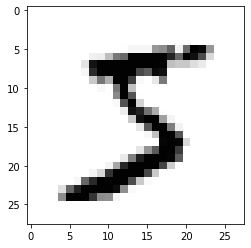

In [ ]:
mnist = tf.keras.datasets.mnist

(train_data, train_labels), (test_data, test_labels) = mnist.load_data()

print(train_data[0])
plt.imshow(train_data[0].reshape(28, 28), cmap='Greys', interpolation='nearest')
plt.show()


# normalizing data
train_data, test_data = train_data / 255.0, test_data / 255.0


In [ ]:
# change data shape

print(train_data.shape)

train_data = train_data.reshape(train_data.shape[0], train_data.shape[1] * train_data.shape[2])
test_data = test_data.reshape(test_data.shape[0], test_data.shape[1] * test_data.shape[2])

print(train_data.shape)

# label to one-hot encoding
train_labels = tf.keras.utils.to_categorical(train_labels, 10)
test_labels = tf.keras.utils.to_categorical(test_labels, 10)


(60000, 28, 28)
(60000, 784)


create the model

In [ ]:
def build_model():
  model = keras.Sequential([
    keras.layers.Dense(input_dim=784, units=512, activation='relu', kernel_initializer='glorot_normal'),
    keras.layers.Dense(units=512, activation='relu', kernel_initializer='glorot_normal'),
    keras.layers.Dense(units=512, activation='relu', kernel_initializer='glorot_normal'),
    keras.layers.Dense(units=512, activation='relu', kernel_initializer='glorot_normal'),
    keras.layers.Dense(units=10, activation='softmax', kernel_initializer='glorot_normal')
  ])

  optimizer = keras.optimizers.SGD(lr=1e-3)

  model.compile(loss='categorical_crossentropy',
                optimizer=optimizer,
                metrics=['accuracy'])
  return model

model = build_model()
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_7 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_8 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_9 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_10 (Dense)             (None, 10)                5130      
Total params: 1,195,018
Trainable params: 1,195,018
Non-trainable params: 0
_________________________________________________________________


위에서 kernel_initializer='glorot_normal'의 경우 모델간의 명확한 평가를 하기 위해서 사용할 수 있는 옵션이다.

Train the model

In [ ]:
EPOCHS = 15

history = model.fit(train_data, train_labels, epochs=EPOCHS)

1875/1875 [==============================] - 8s 4ms/step - loss: 0.9065 - accuracy: 0.8094
Epoch 3/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5103 - accuracy: 0.8688
Epoch 4/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4037 - accuracy: 0.8906
Epoch 5/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3536 - accuracy: 0.9012
Epoch 6/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3227 - accuracy: 0.9082
Epoch 7/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3003 - accuracy: 0.9148
Epoch 8/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2829 - accuracy: 0.9196
Epoch 9/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2682 - accuracy: 0.9233
Epoch 10/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2554 - accuracy: 0.9269
Epoch 11/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2442 - accura

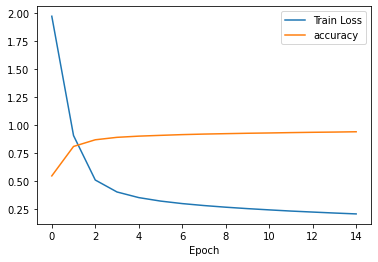

In [ ]:
import matplotlib.pyplot as plt


def plot_history(history):
  plt.figure()
  plt.xlabel('Epoch')
  plt.plot(history.epoch, np.array(history.history['loss']), 
           label='Train Loss')
  plt.plot(history.epoch, np.array(history.history['accuracy']), 
          label='accuracy')
  plt.legend()

plot_history(history)

In [ ]:
evaluation = model.evaluate(test_data, test_labels)
print(evaluation)
print('loss: ', evaluation[0])
print('accuracy', evaluation[1])

313/313 [==============================] - 1s 4ms/step - loss: 0.2040 - accuracy: 0.9424
[0.20400120317935944, 0.9423999786376953]
loss:  0.20400120317935944
accuracy 0.9423999786376953


# mnist NN dropout 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

print(tf.__version__)

2.2.0


data

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

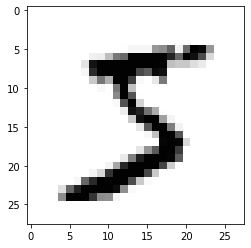

In [ ]:
mnist = tf.keras.datasets.mnist

(train_data, train_labels), (test_data, test_labels) = mnist.load_data()

print(train_data[0])
plt.imshow(train_data[0].reshape(28, 28), cmap='Greys', interpolation='nearest')
plt.show()


# normalizing data
train_data, test_data = train_data / 255.0, test_data / 255.0


In [ ]:
# change data shape

print(train_data.shape)

train_data = train_data.reshape(train_data.shape[0], train_data.shape[1] * train_data.shape[2])
test_data = test_data.reshape(test_data.shape[0], test_data.shape[1] * test_data.shape[2])

print(train_data.shape)

# label to one-hot encoding
train_labels = tf.keras.utils.to_categorical(train_labels, 10)
test_labels = tf.keras.utils.to_categorical(test_labels, 10)


(60000, 28, 28)
(60000, 784)


create the model

In [ ]:
drop_rate = 0.3

def build_model():
  model = keras.Sequential([
    keras.layers.Dense(input_dim=784, units=512, activation='relu', kernel_initializer='glorot_normal'),
    keras.layers.Dropout(drop_rate),
    keras.layers.Dense(units=512, activation='relu', kernel_initializer='glorot_normal'),
    keras.layers.Dropout(drop_rate),
    keras.layers.Dense(units=512, activation='relu', kernel_initializer='glorot_normal'),
    keras.layers.Dropout(drop_rate),
    keras.layers.Dense(units=512, activation='relu', kernel_initializer='glorot_normal'),
    keras.layers.Dropout(drop_rate),
    keras.layers.Dense(units=10, activation='softmax', kernel_initializer='glorot_normal')
  ])

  optimizer = keras.optimizers.SGD(lr=1e-3)

  model.compile(loss='categorical_crossentropy',
                optimizer=optimizer,
                metrics=['accuracy'])
  return model

model = build_model()
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 512)              

Train the model

In [ ]:
EPOCHS = 30

history = model.fit(train_data, train_labels, epochs=EPOCHS)

Epoch 1/30
1875/1875 [==============================] - 9s 5ms/step - loss: 2.2015 - accuracy: 0.2254
Epoch 2/30
1875/1875 [==============================] - 9s 5ms/step - loss: 1.6692 - accuracy: 0.4984
Epoch 3/30
1875/1875 [==============================] - 9s 5ms/step - loss: 1.0634 - accuracy: 0.6551
Epoch 4/30
1875/1875 [==============================] - 9s 5ms/step - loss: 0.8049 - accuracy: 0.7366
Epoch 5/30
1875/1875 [==============================] - 9s 5ms/step - loss: 0.6664 - accuracy: 0.7882
Epoch 6/30
1875/1875 [==============================] - 9s 5ms/step - loss: 0.5895 - accuracy: 0.8159
Epoch 7/30
1875/1875 [==============================] - 9s 5ms/step - loss: 0.5378 - accuracy: 0.8344
Epoch 8/30
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4911 - accuracy: 0.8510
Epoch 9/30
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4570 - accuracy: 0.8616
Epoch 10/30
1875/1875 [==============================] - 9s 5ms/step - loss: 0.434

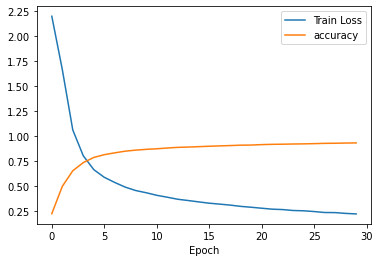

In [ ]:
import matplotlib.pyplot as plt


def plot_history(history):
  plt.figure()
  plt.xlabel('Epoch')
  plt.plot(history.epoch, np.array(history.history['loss']), 
           label='Train Loss')
  plt.plot(history.epoch, np.array(history.history['accuracy']), 
          label='accuracy')
  plt.legend()

plot_history(history)

In [ ]:
evaluation = model.evaluate(test_data, test_labels)
print(evaluation)
print('loss: ', evaluation[0])
print('accuracy', evaluation[1])

313/313 [==============================] - 1s 4ms/step - loss: 0.1519 - accuracy: 0.9550
[0.15186677873134613, 0.9549999833106995]
loss:  0.15186677873134613
accuracy 0.9549999833106995


# Mnist With CNN

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

print(tf.__version__)

2.2.0


data

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

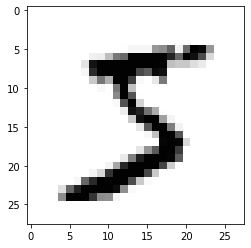

In [ ]:
mnist = tf.keras.datasets.mnist

(train_data, train_labels), (test_data, test_labels) = mnist.load_data()

print(train_data[0])
plt.imshow(train_data[0].reshape(28, 28), cmap='Greys', interpolation='nearest')
plt.show()


# normalizing data
train_data, test_data = train_data / 255.0, test_data / 255.0


In [ ]:
# change data shape

print(train_data.shape)

train_data = train_data.reshape(train_data.shape[0], 28, 28, 1)
test_data = test_data.reshape(test_data.shape[0], 28, 28, 1)

print(train_data.shape)

# label to one-hot encoding
train_labels = tf.keras.utils.to_categorical(train_labels, 10)
test_labels = tf.keras.utils.to_categorical(test_labels, 10)


(60000, 28, 28)
(60000, 28, 28, 1)


create the model

In [ ]:
def build_model():
  model = keras.Sequential([
    keras.layers.Conv2D(filters=16, kernel_size=(3, 3), input_shape=(28, 28, 1), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

    keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

    keras.layers.Flatten(),
    keras.layers.Dense(units=10, kernel_initializer='glorot_normal', activation='softmax')
  ])

  optimizer = keras.optimizers.SGD(lr=1e-3)

  model.compile(loss='categorical_crossentropy',
                optimizer=optimizer,
                metrics=['accuracy'])
  return model

model = build_model()
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 10)                8010      
Total params: 12,810
Trainable params: 12,810
Non-trainable params: 0
__________________________________________________

Train the model

In [ ]:
EPOCHS = 30

history = model.fit(train_data, train_labels, epochs=EPOCHS)

Epoch 1/30
1875/1875 [==============================] - 8s 4ms/step - loss: 2.2399 - accuracy: 0.2821
Epoch 2/30
1875/1875 [==============================] - 8s 5ms/step - loss: 1.3630 - accuracy: 0.7053
Epoch 3/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5163 - accuracy: 0.8580
Epoch 4/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3851 - accuracy: 0.8888
Epoch 5/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3327 - accuracy: 0.9032
Epoch 6/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2984 - accuracy: 0.9119
Epoch 7/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2723 - accuracy: 0.9197
Epoch 8/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2503 - accuracy: 0.9260
Epoch 9/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2323 - accuracy: 0.9306
Epoch 10/30
1875/1875 [==============================] - 9s 5ms/step - loss: 0.216

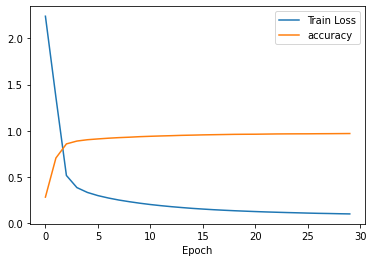

In [ ]:
import matplotlib.pyplot as plt


def plot_history(history):
  plt.figure()
  plt.xlabel('Epoch')
  plt.plot(history.epoch, np.array(history.history['loss']), 
           label='Train Loss')
  plt.plot(history.epoch, np.array(history.history['accuracy']), 
          label='accuracy')
  plt.legend()

plot_history(history)

In [ ]:
evaluation = model.evaluate(test_data, test_labels)
print(evaluation)
print('loss: ', evaluation[0])
print('accuracy', evaluation[1])

313/313 [==============================] - 1s 4ms/step - loss: 0.0888 - accuracy: 0.9733
[0.0887954831123352, 0.9732999801635742]
loss:  0.0887954831123352
accuracy 0.9732999801635742
